In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time

In [2]:
func_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_153/func_0/'

In [3]:
###########################
### PREP VISUAL STIMULI ###
###########################

vision_path = os.path.join(func_path, 'visual')

### Load Photodiode ###
t, ft_triggers, pd1, pd2 = brainsss.load_photodiode(vision_path)
stimulus_start_times = brainsss.extract_stim_times_from_pd(pd2, t)

### Get Metadata ###
stim_ids, angles = brainsss.get_stimulus_metadata(vision_path)
print(F"Found {len(stim_ids)} presented stimuli.")

# *100 puts in units of 10ms, which will match fictrac
starts_angle_0 = [int(stimulus_start_times[i]*100) for i in range(len(stimulus_start_times)) if angles[i] == 0]
starts_angle_180 = [int(stimulus_start_times[i]*100) for i in range(len(stimulus_start_times)) if angles[i] == 180]
print(F"starts_angle_0: {len(starts_angle_0)}. starts_angle_180: {len(starts_angle_180)}")

loading photodiode data... done
Loaded from Pickle.
Found 749 presented stimuli.
starts_angle_0: 248. starts_angle_180: 248


In [4]:
####################
### Prep Fictrac ###
####################

fictrac_path = os.path.join(func_path, 'fictrac')
fictrac_raw = brainsss.load_fictrac(fictrac_path)

fps = 100
resolution = 10 #desired resolution in ms
expt_len = fictrac_raw.shape[0]/fps*1000
behaviors = ['dRotLabY', 'dRotLabZ']
fictrac = {}
for behavior in behaviors:
    if behavior == 'dRotLabY': short = 'Y'
    elif behavior == 'dRotLabZ': short = 'Z'
    fictrac[short] = brainsss.smooth_and_interp_fictrac(fictrac_raw, fps, resolution, expt_len, behavior)
xnew = np.arange(0,expt_len,resolution)

(0, 500)

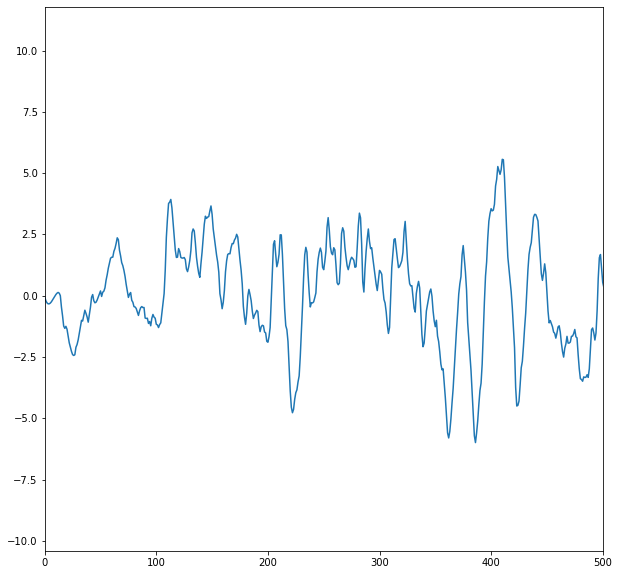

In [5]:
plt.figure(figsize=(10,10))
plt.plot(fictrac['Y'])
plt.xlim(0,500)

In [6]:
plt.figure(figsize=(10,10))
for i in range(len(traces)):
    plt.plot(traces[i])
plt.axhline(0)
for i in [200,250,275,400,450,475]:
    plt.axvline(i,color='k',linestyle='--')

NameError: name 'traces' is not defined

<Figure size 720x720 with 0 Axes>

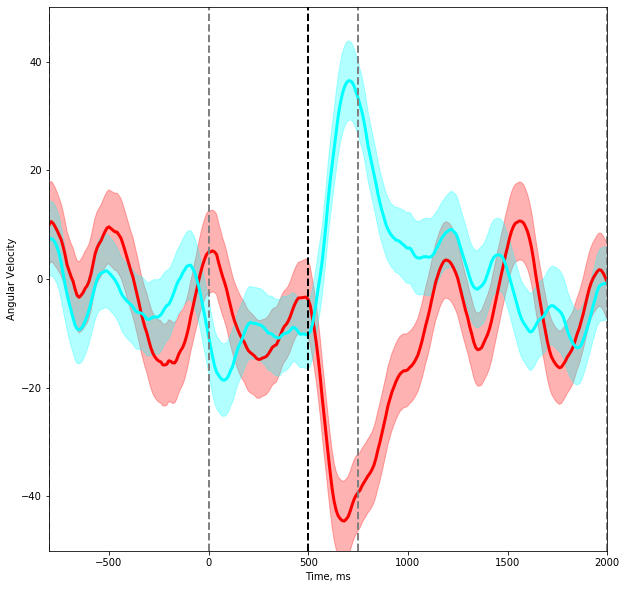

In [7]:
pre_window = 200 # in units of 10ms
post_window = 300

traces = []
for i in range(len(starts_angle_0)):
    trace = fictrac['Z'][starts_angle_0[i]-pre_window:starts_angle_0[i]+post_window]
    if len(trace) == pre_window + post_window: # this handles fictrac that crashed or was aborted or some bullshit
        traces.append(trace)
traces_0 = np.asarray(traces)
mean_trace_0 = np.mean(traces_0,axis=0)
sem_trace_0 = sem(traces_0,axis=0)

traces = []
for i in range(len(starts_angle_180)):
    trace = fictrac['Z'][starts_angle_180[i]-pre_window:starts_angle_180[i]+post_window]
    if len(trace) == pre_window + post_window: # this handles fictrac that crashed or was aborted or some bullshit
        traces.append(trace)
traces_180 = np.asarray(traces)
mean_trace_180 = np.mean(traces_180,axis=0)
sem_trace_180 = sem(traces_180,axis=0)

plt.figure(figsize=(10,10))
xs = np.arange(-pre_window,post_window)*10


plt.plot(xs, mean_trace_0,color='r',linewidth=3)
plt.fill_between(xs, mean_trace_0-sem_trace_0, mean_trace_0+sem_trace_0, color='red',alpha=0.3)



plt.plot(xs, mean_trace_180,color='cyan',linewidth=3)
plt.fill_between(xs, mean_trace_180-sem_trace_180, mean_trace_180+sem_trace_180, color='cyan',alpha=0.3)

plt.axvline(-1250,color='grey',lw=2,linestyle='--') # grey
plt.axvline(-800,color='grey',lw=2,linestyle='--') # grey
plt.axvline(0,color='grey',lw=2,linestyle='--') # stim appears
plt.axvline(500,color='k',lw=2,linestyle='--') # stim moves
plt.axvline(750,color='grey',lw=2,linestyle='--') # grey
plt.axvline(2000,color='grey',lw=2,linestyle='--') # grey
plt.ylim(-50,50)
plt.xlabel('Time, ms')
plt.ylabel('Angular Velocity')

plt.xlim(-800,2000)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [22]:
pre_window = 0 # in units of 10ms
post_window = 100

traces_Z = []
traces_Y = []
for i in range(len(starts_angle_0)):
    trace_Z = fictrac['Z'][starts_angle_0[i]-pre_window:starts_angle_0[i]+post_window]
    trace_Y = fictrac['Y'][starts_angle_0[i]-pre_window:starts_angle_0[i]+post_window]

    if len(trace_Z) == pre_window + post_window: # this handles fictrac that crashed or was aborted or some bullshit
        traces_Z.append(trace_Z)
        traces_Y.append(trace_Y)

traces_Z = np.asarray(traces_Z)
traces_Y = np.asarray(traces_Y)


In [24]:
pre_window = 0 # in units of 10ms
post_window = 100

traces_Z = []
traces_Y = []
for i in range(len(starts_angle_180)):
    trace_Z = fictrac['Z'][starts_angle_180[i]-pre_window:starts_angle_180[i]+post_window]
    trace_Y = fictrac['Y'][starts_angle_180[i]-pre_window:starts_angle_180[i]+post_window]

    if len(trace_Z) == pre_window + post_window: # this handles fictrac that crashed or was aborted or some bullshit
        traces_Z.append(trace_Z)
        traces_Y.append(trace_Y)

traces_Z = np.asarray(traces_Z)
traces_Y = np.asarray(traces_Y)


In [23]:
Zs_0=np.mean(traces_Z,axis=0)
Ys_0=np.mean(traces_Y,axis=0)

In [25]:
Zs_180=np.mean(traces_Z,axis=0)
Ys_180=np.mean(traces_Y,axis=0)

(-50, 50)

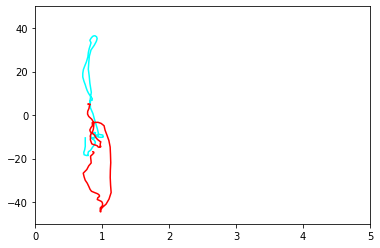

In [30]:


# for i in range(traces_Y.shape[0]):
#     plt.plot(traces_Y[i,:], traces_Z[i,:])

plt.plot(Ys_180,Zs_180,color='cyan')
plt.plot(Ys_0,Zs_0,color='red')
    
plt.xlim(0,5)
plt.ylim(-50,50)

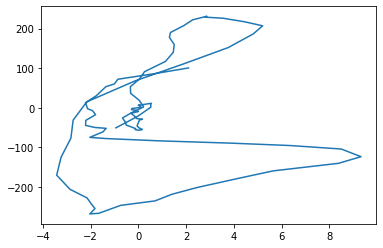

In [17]:
#for i in range(traces_Y.shape[0]):
i=0
plt.plot(traces_Y[i,:], traces_Z[i,:])

In [77]:
# trace is 500 wide
# with 200 pre and 300 post
# so, 250 is bar movement, 275 is bar stop


window_start = 250
window_stop = 300
threshold = -20

vis_evoked_turns = []
for i in range(traces_0.shape[0]):
    visual_turn_magnitude = np.mean(traces_0[i,window_start:window_stop])
    if visual_turn_magnitude < threshold:
        vis_evoked_turns.append(traces_0[i])
    else:
        vis_evoked_turns.append(np.zeros(500))
        
vis_evoked_turns = np.asarray(vis_evoked_turns)

(150, 350)

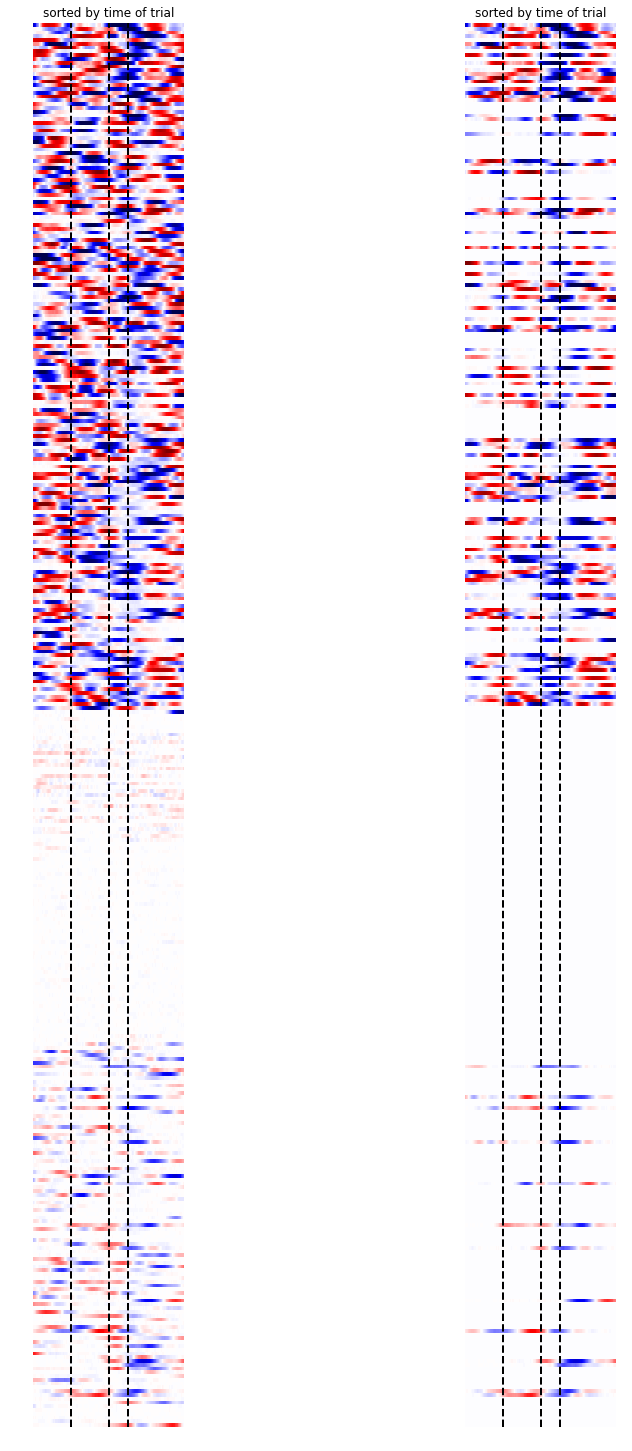

In [78]:
fig = plt.figure(figsize=(15,15))

### all resp ###
ax_dend = fig.add_axes([.5, .3, 1, 1.3])
plt.title('sorted by time of trial')
ax_dend.imshow(traces_0,vmin=-400,vmax=400,aspect=5,cmap='seismic')
ax_dend.axis('off')
for line in [200,250,275]: # 
    ax_dend.axvline(line,color='k',linestyle='--',lw=2)
plt.xlim(150,350)
# for line in [93]:
#     ax_dend.axhline(line,color='k',linestyle='--',lw=2)
   
### all resp ###
ax_dend = fig.add_axes([.9, .3, 1, 1.3])
plt.title('sorted by time of trial')
ax_dend.imshow(vis_evoked_turns,vmin=-400,vmax=400,aspect=5,cmap='seismic')
ax_dend.axis('off')
for line in [200,250,275]: # 
    ax_dend.axvline(line,color='k',linestyle='--',lw=2)
plt.xlim(150,350)
    
# ax_dend = fig.add_axes([.9, .3, 1, 1.3])
# plt.title('sorted by time of trial')
# ax_dend.imshow(traces_180,vmin=-400,vmax=400,aspect=5,cmap='seismic')
# ax_dend.axis('off')
# for line in [200,250,275]: # 
#     ax_dend.axvline(line,color='k',linestyle='--',lw=2)
# plt.xlim(150,350)
# # pre_window = 200 # in units of 10ms
# # post_window = 300

#blue is neg


(150, 350)

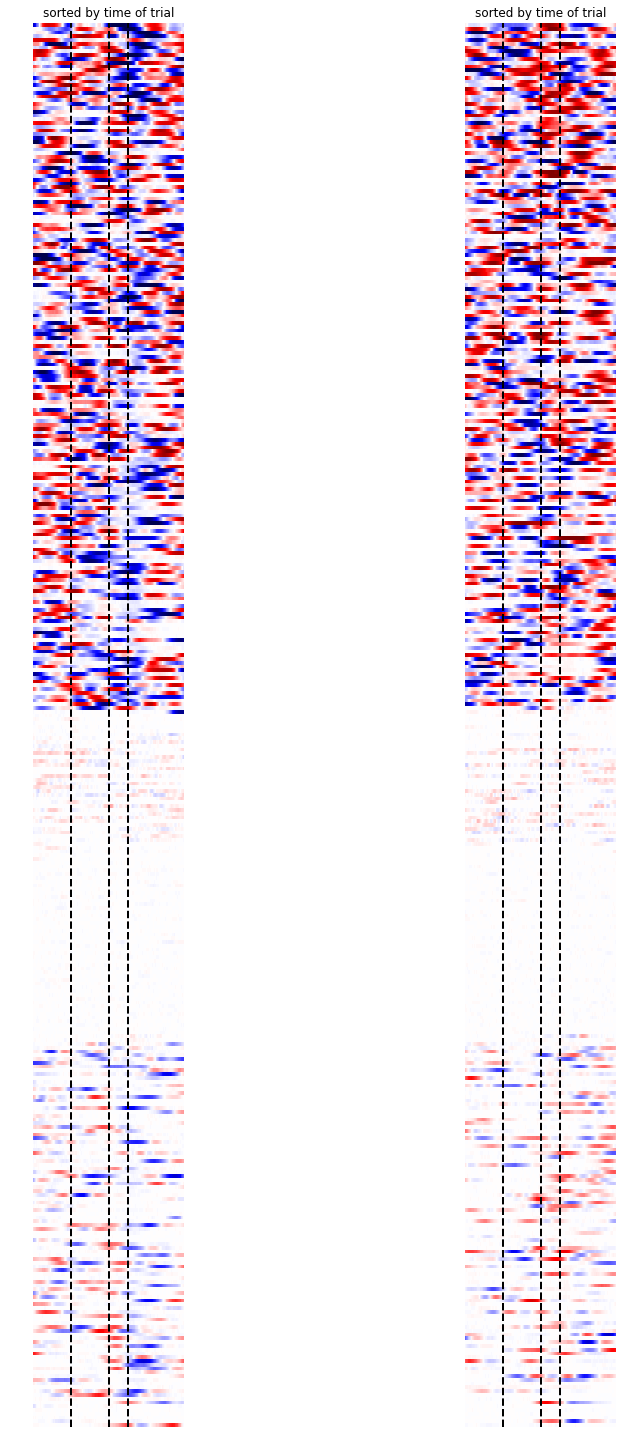

In [66]:
fig = plt.figure(figsize=(15,15))

### all resp ###
ax_dend = fig.add_axes([.5, .3, 1, 1.3])
plt.title('sorted by time of trial')
ax_dend.imshow(traces_0,vmin=-400,vmax=400,aspect=5,cmap='seismic')
ax_dend.axis('off')
for line in [200,250,275]: # 
    ax_dend.axvline(line,color='k',linestyle='--',lw=2)
plt.xlim(150,350)
# for line in [93]:
#     ax_dend.axhline(line,color='k',linestyle='--',lw=2)
    
    
ax_dend = fig.add_axes([.9, .3, 1, 1.3])
plt.title('sorted by time of trial')
ax_dend.imshow(traces_180,vmin=-400,vmax=400,aspect=5,cmap='seismic')
ax_dend.axis('off')
for line in [200,250,275]: # 
    ax_dend.axvline(line,color='k',linestyle='--',lw=2)
plt.xlim(150,350)
# pre_window = 200 # in units of 10ms
# post_window = 300



In [79]:
def find_bouts(fictrac):
    expt_len = 1000*30*60
    resolution = 10
    high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res

    behavior = 'Z'
    fictrac[behavior] = fictrac[behavior] * -1 ### TO GET OPPOSITE TURN

    B_THRESHOLD = np.std(fictrac[behavior])/4
    ALIVE_TIME = 100 # in ms
    DEAD_TIME = 100 # in ms

    state = 'quiescent'
    up_streak = 0
    down_streak = 0
    BOUTS = []
    ALIVE_TIME = int(ALIVE_TIME/resolution)
    DEAD_TIME = int(DEAD_TIME/resolution)

    for i in range(len(fictrac[behavior])):
        # If high behavior, reset down_streak, and add 1 to up_streak
        if fictrac[behavior][i] > B_THRESHOLD:
            down_streak = 0
            up_streak += 1
        else:
            up_streak = 0
            down_streak += 1

        if state == 'quiescent':
            if up_streak >= ALIVE_TIME:
                state = 'moving'
                BOUTS.append({'start': i-ALIVE_TIME})
        elif state == 'moving':
            if down_streak >= DEAD_TIME:
                state = 'quiescent'
                BOUTS[-1]['end'] = i-DEAD_TIME
    BOUTS = [bout for bout in BOUTS if 'end' in bout]
    print('Found {} bouts'.format(len(BOUTS)))
    return BOUTS

In [80]:
bouts = find_bouts(fictrac)

Found 1038 bouts


In [81]:
bout_starts = [bouts[i]['start'] for i in range(len(bouts))]

178515

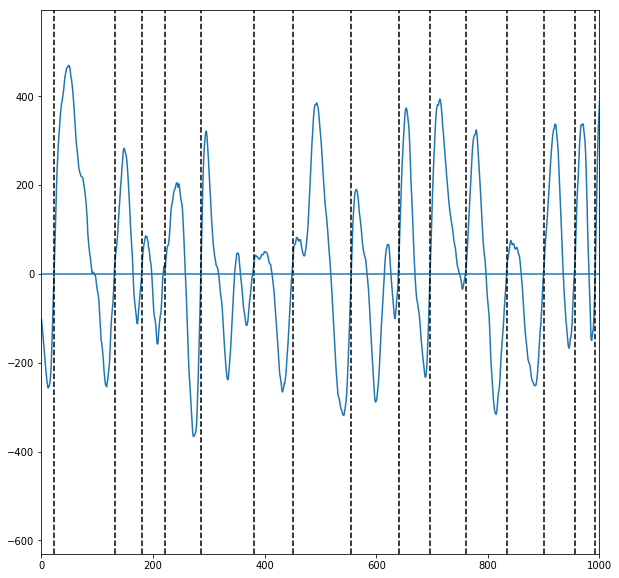

In [86]:
plt.figure(figsize=(10,10))
plt.plot(fictrac['Z'])
for i in range(20):
    plt.axvline(bouts[i]['start'],color='k', linestyle='--')
plt.xlim(0,1000)
plt.axhline(0)

In [ ]:
# for each starts_angle, see if there is a bout_start within 300ms
# currently looking at left turns in response to left mocing stimulus

visual_evoked_turn = []
for stimulus_event in starts_angle_180:
    for bout_event in bout_starts:
        if stimulus_event <= bout_event <= stimulus_event + 30:
            visual_evoked_turn.append(stimulus_event)

In [109]:
# for each starts_angle, see if there is a bout_start within 300ms
# currently looking at RIGHT turns in response to RIGHT moving stimulus

visual_evoked_turn = []
traces_filtered = []
for i,stimulus_event in enumerate(starts_angle_0):
    stimulus_event += 50
    for bout_event in bout_starts:
        if stimulus_event <= bout_event <= stimulus_event + 30:
            traces_filtered.append(list(traces_0[i]))
            visual_evoked_turn.append(stimulus_event)
traces_filtered = np.asarray(traces_filtered)

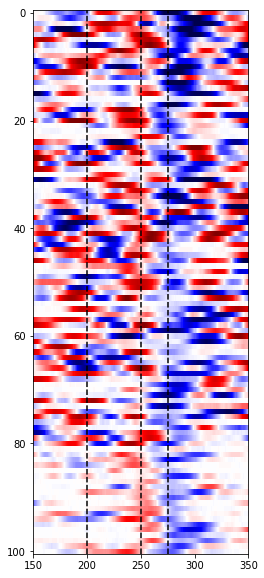

In [115]:
plt.figure(figsize=(10,10))
plt.imshow(traces_filtered,cmap='seismic',aspect=5,vmin=-400,vmax=400)
plt.xlim(150,350)
plt.axvline(200,color='k',linestyle='--')
plt.axvline(250,color='k',linestyle='--')
plt.axvline(275,color='k',linestyle='--')

In [ ]:
fig = plt.figure(figsize=(15,15))

### all resp ###
ax_dend = fig.add_axes([.5, .3, 1, 1.3])
plt.title('sorted by time of trial')
ax_dend.imshow(traces_0,vmin=-400,vmax=400,aspect=5,cmap='seismic')
ax_dend.axis('off')
for line in [200,250,275]: # 
    ax_dend.axvline(line,color='k',linestyle='--',lw=2)
plt.xlim(150,350)

In [27]:
t_min = [i/1000/60 for i in t]

In [24]:
1800/2

900.0

In [19]:
stimulus_start_times[-1]

1733.6771

In [29]:
stimulus_start_times_min = [i/60 for i in stimulus_start_times]

In [12]:
len(pd1)/10000/60

30.0

(550000, 650000)

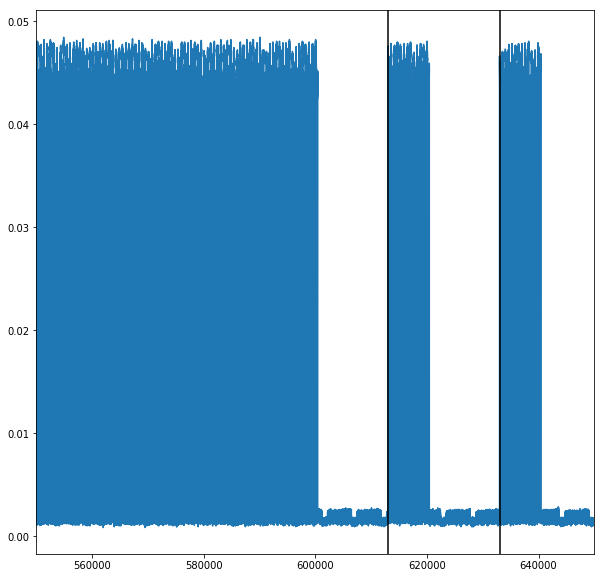

In [25]:
plt.figure(figsize=(10,10))
plt.plot(pd1)
for i in stimulus_start_times_highres:
    plt.axvline(i,color='k')
plt.xlim(600000-50000,600000+50000)

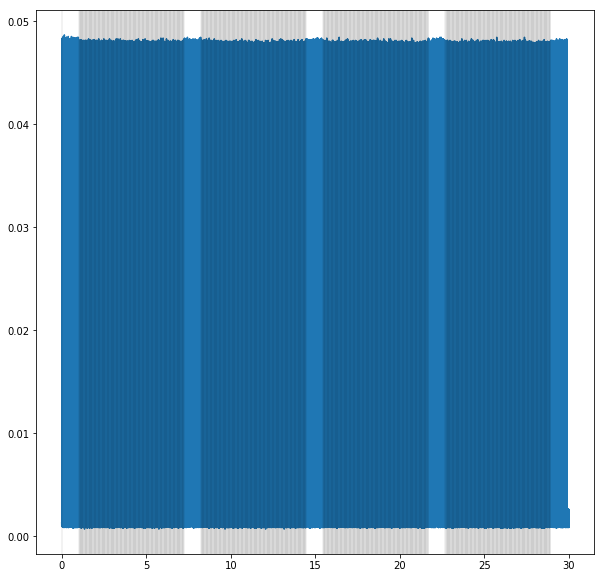

In [32]:
plt.figure(figsize=(10,10))
plt.plot(t_min, pd1)
for i in stimulus_start_times_min:
    plt.axvline(i,color='k',lw=.1)
#plt.xlim(0,600000+50000)

(0, 10000)

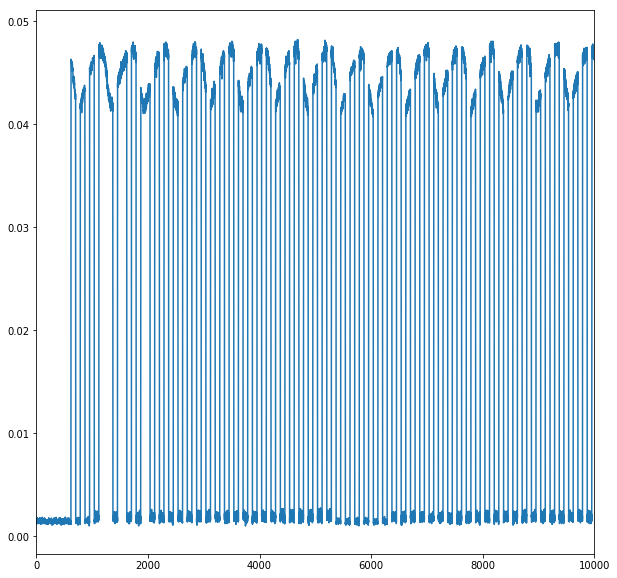

In [17]:
plt.figure(figsize=(10,10))
plt.plot(pd1)
plt.xlim(0,10000)